In [1]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as ttp#To break dataset for training and Traing
from sklearn.metrics import classification_report#To generate classification report
import seaborn as sns
data_pos=pd.read_excel("/content/pass_list.xlsx")
data_neg=pd.read_excel("/content/fail_list.xlsx")
data_pos.to_csv("pos.csv")
data_neg.to_csv("neg.csv")


In [2]:
print(data_neg)
print(data_pos)

        Name  Percentage
0        ram          18
1       sita          35
2     charan          25
3      ramya          37
4    krishna          41
5     bheema          25
6       riya          14
7       siya          26
8    nopitha          29
9   doraemon          37
10   shizuka          39
        Name  Percentage
0     seetha          67
1     geetha          78
2       rama          56
3   lakshman          98
4    hanuman          53
5     yamini          76
6     jyothi          56
7     lahari          99
8    lalitha          87
9      priya          67
10   lakshmi          98
11    nithya          56


In [3]:
data_pos.shape,data_neg.shape


((12, 2), (11, 2))

In [4]:
data_pos["class"]=1
data_neg["class"]=0

In [8]:
first_data=data_pos.tail(15)
second_data=data_neg.tail(18)
result=pd.concat([first_data,second_data],axis=0)
result.to_csv("result.csv")

In [9]:
result=pd.read_csv("/content/result.csv")
print(result)

    Unnamed: 0      Name  Percentage  class
0            0    seetha          67      1
1            1    geetha          78      1
2            2      rama          56      1
3            3  lakshman          98      1
4            4   hanuman          53      1
5            5    yamini          76      1
6            6    jyothi          56      1
7            7    lahari          99      1
8            8   lalitha          87      1
9            9     priya          67      1
10          10   lakshmi          98      1
11          11    nithya          56      1
12           0       ram          18      0
13           1      sita          35      0
14           2    charan          25      0
15           3     ramya          37      0
16           4   krishna          41      0
17           5    bheema          25      0
18           6      riya          14      0
19           7      siya          26      0
20           8   nopitha          29      0
21           9  doraemon        

Percentage
14    1
18    1
25    2
26    1
29    1
35    1
37    2
39    1
41    1
53    1
56    3
67    2
76    1
78    1
87    1
98    2
99    1
Name: Name, dtype: int64


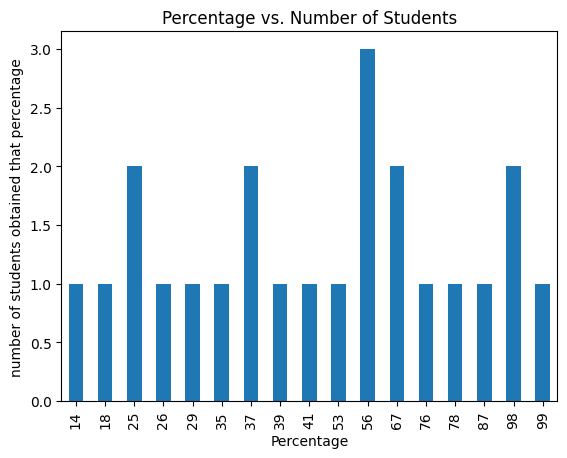

In [10]:
print(result.groupby(["Percentage"])["Name"].count())
result.groupby(["Percentage"])["Name"].count().plot(kind='bar')
plt.title("Percentage vs. Number of Students")
plt.xlabel("Percentage")
plt.ylabel("number of students obtained that percentage")
plt.show()

class
0    11
1    12
Name: Name, dtype: int64
0-Fail
1-Pass


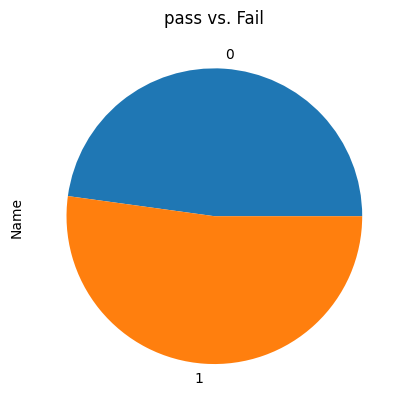

In [11]:
print(result.groupby(["class"])["Name"].count())
print('0-Fail\n1-Pass')
result.groupby(["class"])["Name"].count().plot(kind="pie")
plt.title("pass vs. Fail")
plt.show()

In [12]:
testing_data=result.drop(["Unnamed: 0","Name"],axis=1)
print(testing_data)

    Percentage  class
0           67      1
1           78      1
2           56      1
3           98      1
4           53      1
5           76      1
6           56      1
7           99      1
8           87      1
9           67      1
10          98      1
11          56      1
12          18      0
13          35      0
14          25      0
15          37      0
16          41      0
17          25      0
18          14      0
19          26      0
20          29      0
21          37      0
22          39      0


In [13]:
#shuffling data
testing_data=testing_data.sample(frac=1)
testing_data.head(10)

,Percentage,class
22,39,0
3,98,1
15,37,0
18,14,0
21,37,0
8,87,1
7,99,1
4,53,1
14,25,0
6,56,1


In [14]:
#to check whether the data has any empty spaces or not
testing_data.isnull().sum()

Percentage    0
class         0
dtype: int64

In [15]:
x=testing_data["Percentage"]
y=testing_data["class"]

In [16]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [18]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [19]:
x_train = x_train.astype(str)
x_test = x_test.astype(str)

In [20]:
vector=TfidfVectorizer()
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train)
accuracy=LR.score(xv_test,y_test).round(2)
print("Accuracy is",accuracy)
predict_LR=LR.predict(xv_test)
print(classification_report(y_test,predict_LR))

Accuracy is 0.2
              precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           1       0.00      0.00      0.00         4

    accuracy                           0.20         5
   macro avg       0.10      0.50      0.17         5
weighted avg       0.04      0.20      0.07         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
